Thank You KGP Talkie for the lesson

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D, Conv2D, Dropout

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
classes_name = ['airplane', 'automobile' ,'bird', 'cat', 'dog', 'frog','horse','ship','truck']

In [0]:
#Data Normalization
X_train = X_train/255.0
X_test = X_test/255.0

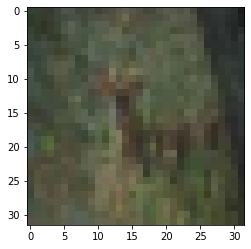

In [6]:
plt.imshow(X_train[10])

In [7]:
#Build CNN Model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units= 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [9]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
5000/5000 [==============================] - 91s 18ms/step - loss: 1.4902 - sparse_categorical_accuracy: 0.4617 - val_loss: 1.2133 - val_sparse_categorical_accuracy: 0.5611
Epoch 2/10
5000/5000 [==============================] - 89s 18ms/step - loss: 1.1952 - sparse_categorical_accuracy: 0.5741 - val_loss: 1.0726 - val_sparse_categorical_accuracy: 0.6169
Epoch 3/10
5000/5000 [==============================] - 86s 17ms/step - loss: 1.0795 - sparse_categorical_accuracy: 0.6185 - val_loss: 0.9799 - val_sparse_categorical_accuracy: 0.6581
Epoch 4/10
5000/5000 [==============================] - 85s 17ms/step - loss: 1.0091 - sparse_categorical_accuracy: 0.6431 - val_loss: 0.9259 - val_sparse_categorical_accuracy: 0.6759
Epoch 5/10
5000/5000 [==============================] - 85s 17ms/step - loss: 0.9509 - sparse_categorical_accuracy: 0.6627 - val_loss: 0.8913 - val_sparse_categorical_accuracy: 0.6920
Epoch 6/10
5000/5000 [==============================] - 87s 17ms/step - loss: 0.

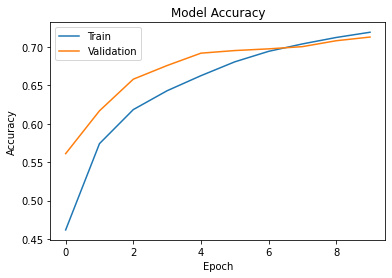

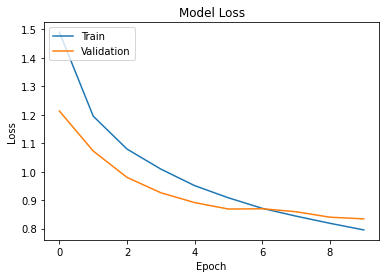

In [10]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fefebb30fd0>)

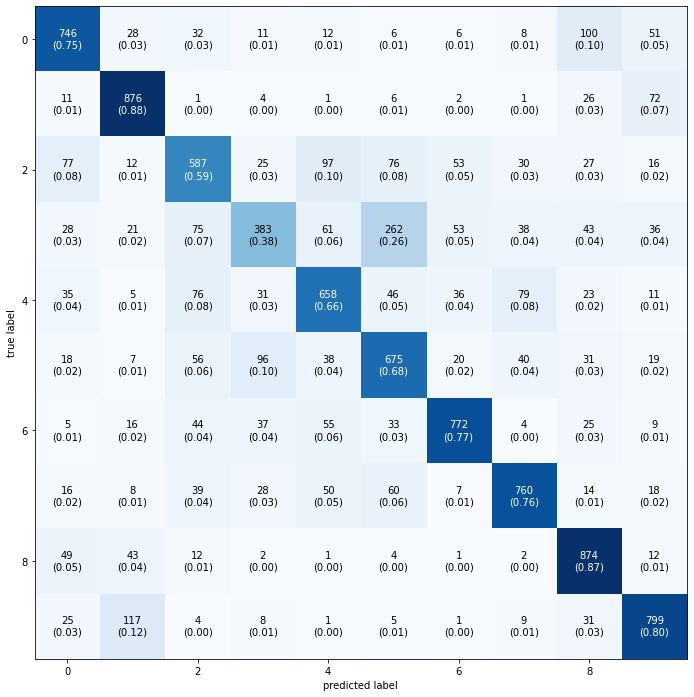

In [15]:
y_pred=model.predict_classes(X_test)
mat = confusion_matrix(Y_test,y_pred)

plot_confusion_matrix(mat,figsize=(12,12), show_normed=True)